In [23]:
import numpy as np
import pandas as pd 

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
stocks = input("Enter the code of the stock: -")
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)
data

Enter the code of the stock: -NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,7.349,7.540,7.283,7.483,27299
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
...,...,...,...,...,...
2021-01-11,2.600,2.811,2.589,2.747,177248
2021-01-12,2.794,2.899,2.718,2.753,201432
2021-01-13,2.737,2.826,2.708,2.727,169240


In [25]:
data.shape

(3283, 5)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3283 entries, 2007-12-31 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3283 non-null   float64
 1   High    3283 non-null   float64
 2   Low     3283 non-null   float64
 3   Close   3283 non-null   float64
 4   Volume  3283 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.9 KB


In [27]:
data.describe()

,Open,High,Low,Close,Volume
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000
mean,3.714812,3.788431,3.636149,3.708224,131365.895218
std,1.831245,1.866609,1.790444,1.826208,54415.091229
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691500,2.737000,2.644000,2.693000,91735.000000
50%,3.253000,3.313000,3.184000,3.242000,126609.000000
75%,4.158500,4.245000,4.068000,4.153000,161479.000000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


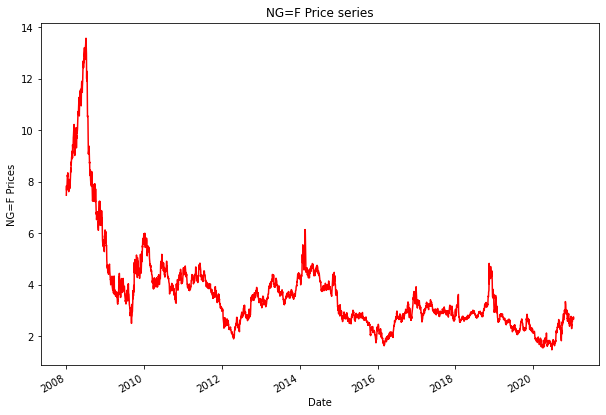

In [28]:
#DATA ANALYSIS

data.Close.plot(figsize=(10, 7), color='r')
plt.ylabel('{} Prices'.format(stocks))
plt.title('{} Price series'.format(stocks))
plt.show()

/home/yvette/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

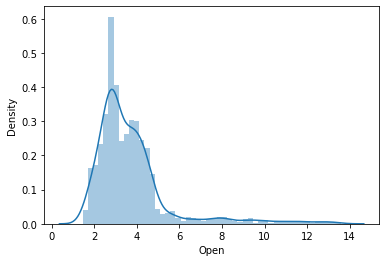

In [29]:
sns.distplot(data['Open'])

/home/yvette/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

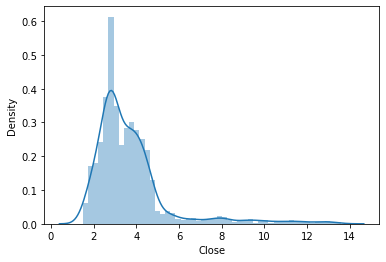

In [30]:
sns.distplot(data['Close'])

/home/yvette/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

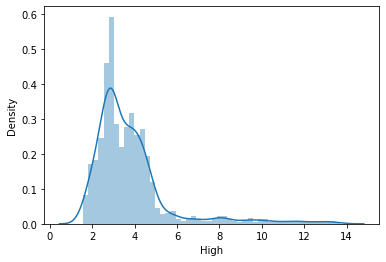

In [31]:
sns.distplot(data['High'])

In [32]:
#conclusions
# we have understood
# - The shape of the data
# - How our data is distributed
# - Its very very non linear

# linear,logistic, regularized, SVM, PCA (Principal Command Analysis), 

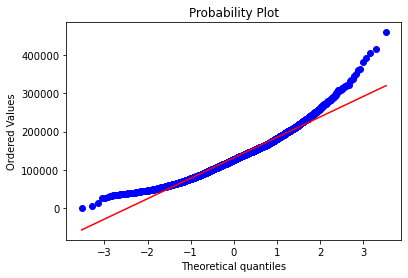

In [33]:
from scipy import stats


#get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Volume'], plot=plt)
plt.show()

In [34]:
    # 1.linea  regresion
#     --------------------

from sklearn.model_selection import train_test_split

X = data.drop("Close", axis=1)
y = data["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2626, 4)
(657, 4)
(2626,)
(657,)


In [35]:
# modeling part, limear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

predictions


array([ 2.69263125,  5.62775289,  2.67593446,  5.70059119,  3.7941102 ,
       13.2233934 ,  3.96973992,  1.84058023,  1.79578996,  1.92988411,
        2.48501196,  3.27902664,  2.87223557,  2.97788951,  4.26721237,
        2.57749429,  3.44524095,  2.72173285,  9.00107585,  3.61963762,
        1.7802419 ,  2.66344549,  2.54589019,  2.91238601,  2.3834322 ,
        3.21828194,  3.68985393,  3.88874655,  2.89436113,  1.82668276,
        4.02022772,  2.99235628, 11.50173894,  4.37936147,  4.42032125,
        2.6264692 ,  3.52318183,  5.47030452,  3.79465214,  3.42236918,
        3.97028677,  2.70335735,  1.87448306,  2.6098818 ,  1.92071192,
        1.74599183,  4.21605553,  2.98374319,  3.85474126,  1.99358448,
        4.08094844,  3.5786507 ,  2.48258324,  4.10339979,  1.92736655,
        3.23535888,  4.54311568,  5.059409  ,  1.85311728,  3.27418655,
        2.92296426,  4.0916382 ,  4.79600944,  2.70006357,  4.825725  ,
        2.20432073,  4.3684868 ,  3.08206643,  2.83099057,  2.11

In [36]:
print("Actual value of Close is:- ", y_test[0])
print("Model Predicted value of Close is:- ", predictions[0])

Actual value of Close is:-  2.681999921798706
Model Predicted value of Close is:-  2.69263125005433


In [37]:
predictions.shape

(657,)

In [40]:
# model evaluation
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    '''
    
    y_test:- ground truth
    y_pred:- model predict
    '''
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)
    
    print("MSE:- ", mse)
    print("RMSE:- ", rmse)
    print("R2_score:- ", r2_scors)

calculate_metrics(y_test, predictions)

# from the results linear regression performs quite good as rmse and mse are almost zero and r2_score 1

MSE:-  0.0013865447236238253
RMSE:-  0.037236336066050126
R2_score:-  0.999490355617278
